# Transcription factor activity inference

In [2]:
# load packages
import scanpy as sc
import decoupler as dc

In [3]:
adata = sc.read_h5ad('./GSE184880_HGSCO_annoed.h5ad')
adata

/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 51215 × 3533
    obs: 'sample', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'dendrogram_leiden', 'group_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'scaled|original|X_pca'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

/Users/jialechen/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


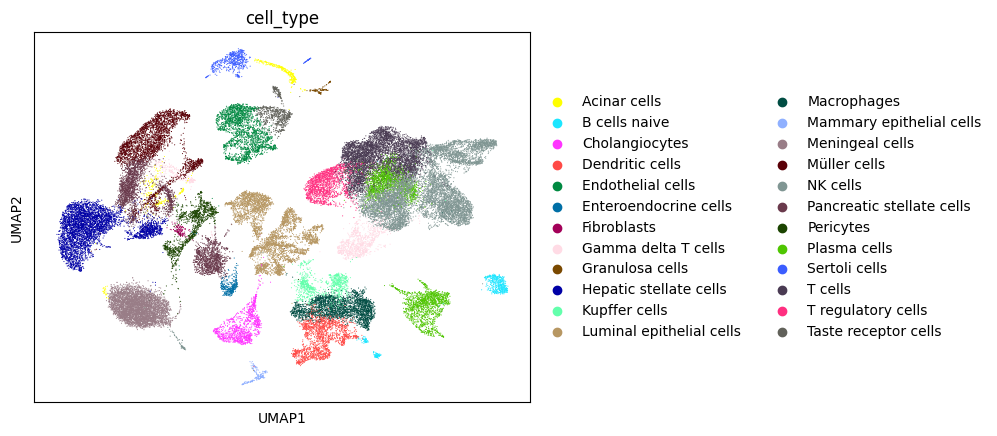

In [4]:
sc.pl.umap(adata, color='cell_type')

## CollecTRI network

In [5]:
net = dc.get_collectri(organism='human', split_complexes=False)
net

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [6]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False,
)

Running ulm on mat with 51215 samples and 3533 targets for 495 sources.


In [7]:
adata.obsm['ulm_estimate']

,ABL1,AEBP1,AHR,AIRE,AP1,APEX1,AR,ARID3A,ARID4B,ARNT,...,ZNF143,ZNF148,ZNF202,ZNF300,ZNF331,ZNF354C,ZNF362,ZNF384,ZNF699,ZNF91
AAACCCAAGGACAGCT-1,1.443487,0.476810,-0.800111,0.089282,-2.596822,0.322978,-0.099226,3.468796,0.545565,0.264795,...,0.732707,1.049016,-0.296563,-1.111955,-2.329894,-0.591686,0.043134,-0.647741,-0.554524,-0.122849
AAACCCAAGGTATCTC-1,-1.914086,-0.320927,0.096057,1.511882,-0.751804,-0.797233,0.682434,-0.509834,-0.545590,-1.240160,...,-0.328692,-0.303892,-1.157562,0.484101,-0.419777,-0.676407,-0.412357,0.049721,-0.077018,-0.780040
AAACCCACAAGTGCAG-1,-0.918212,-0.655202,-0.876640,0.131520,-0.864731,0.608353,-0.162232,-0.546264,-0.215748,-0.796371,...,-0.365133,-0.329289,0.860326,-0.474352,1.364535,-0.728326,1.197221,-0.052677,-1.470662,2.885221
AAACCCACACCCTCTA-1,0.404251,0.231535,-0.839804,-0.597087,-2.025300,-0.521483,-0.030143,0.144282,-1.159497,-0.076181,...,-0.397865,0.201483,-0.013607,-1.154428,1.528590,-0.820821,1.342730,-0.141738,-0.689449,-0.457269
AAACCCACACTCCGGA-1,-1.603863,-0.124593,-0.486627,-0.062749,-0.899797,0.364515,1.714806,2.327788,0.517045,-0.772463,...,1.005896,0.199508,0.306182,-0.315190,-0.400885,-0.645652,-0.228595,-0.650066,-0.863387,-0.457885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGTTGGCTT-1,0.583742,-0.434233,0.586211,-0.989667,-1.584743,0.850872,-1.000181,-0.527243,0.593437,0.277785,...,-0.370977,-0.698644,0.618394,-0.432301,1.946455,1.569321,-0.597093,-0.638416,1.990781,-0.823371
TTTGGTTGTTCCTACC-1,0.552506,0.274366,-3.083288,-0.196861,-1.566036,-0.890334,-0.925751,1.997123,0.677882,0.310852,...,2.842126,-1.076506,1.744306,-0.910790,-5.833460,-1.193419,-1.206014,0.825754,2.612308,-0.750862
TTTGGTTGTTTCGCTC-1,-0.127195,-0.342280,-1.562425,-0.446403,-2.074778,-1.264559,-1.689232,1.444202,1.634218,0.177265,...,2.903348,0.213427,1.421413,-0.200933,-3.598459,-0.687770,-1.435161,0.297199,3.608860,-0.753236
TTTGGTTTCCACAAGT-1,1.202680,-0.485690,-0.581130,-0.053364,-1.372486,-0.804582,-0.894210,-0.471730,0.496363,-0.587340,...,-0.317635,-0.125294,0.647996,0.736899,-0.254520,0.086521,-0.615046,-0.606809,-0.297054,-0.788607


In [8]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 51215 × 3533
    obs: 'sample', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'dendrogram_leiden', 'group_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'scaled|original|X_pca', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'lognorm', 'scaled'
    obsp: 'connectivities', 'distances'

## Visualization

In [9]:
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts

/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/jialechen/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 51215 × 495
    obs: 'sample', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    uns: 'cell_type_colors', 'dendrogram_leiden', 'group_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'scaled|original|X_pca', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'

/Users/jialechen/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


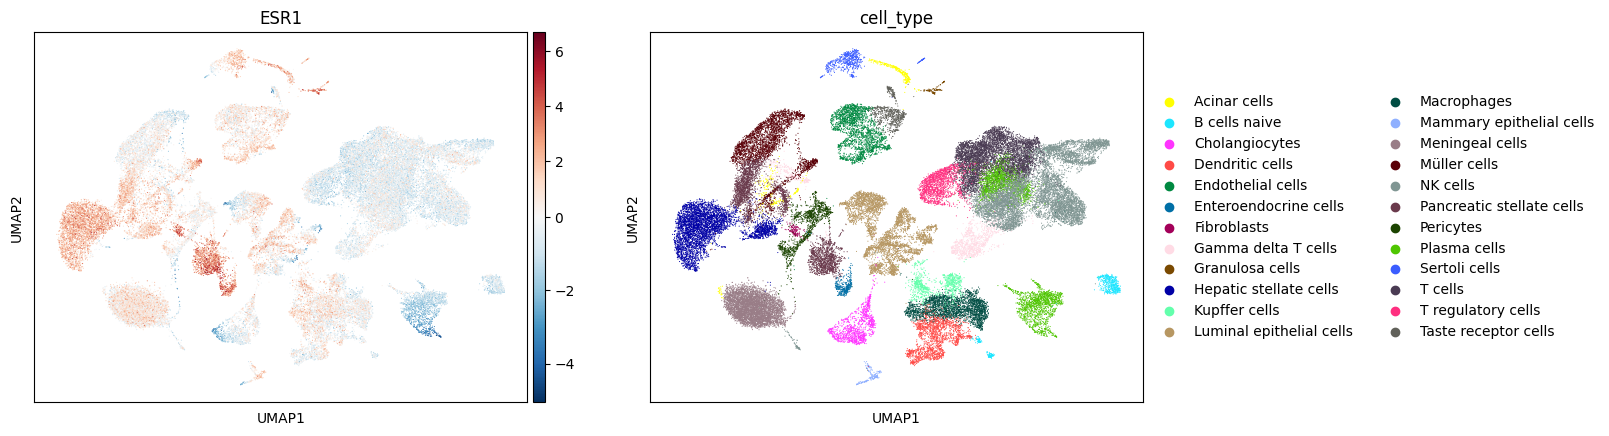

In [10]:
sc.pl.umap(acts, color=['ESR1', 'cell_type'], cmap='RdBu_r', vcenter=0)

## Exploration

In [11]:
df = dc.rank_sources_groups(acts, groupby='cell_type', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,Acinar cells,rest,SF1,26.338661,5.490495,4.115542e-102,1.018597e-99
1,Acinar cells,rest,NR5A1,24.982410,4.539165,9.312749e-101,1.536604e-98
2,Acinar cells,rest,NR5A2,24.639722,4.136316,7.903531e-99,9.780620e-97
3,Acinar cells,rest,GATA6,24.582420,2.693003,2.338255e-102,1.018597e-99
4,Acinar cells,rest,TCF21,22.691038,2.973176,2.561244e-91,2.535631e-89
...,...,...,...,...,...,...,...
11875,Taste receptor cells,rest,RUNX3,-17.518250,-0.924326,5.078614e-62,1.675943e-60
11876,Taste receptor cells,rest,EGR2,-17.600660,-1.020878,1.186730e-60,3.455478e-59
11877,Taste receptor cells,rest,IRF1,-19.532326,-1.430878,4.009127e-73,2.205020e-71
11878,Taste receptor cells,rest,TBX21,-20.650148,-1.301944,6.484644e-77,4.012373e-75


In [12]:
## extract the top 3 markers per cell type:
n_markers = 3
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'Acinar cells': ['SF1', 'NR5A1', 'NR5A2'],
 'B cells naive': ['RFXAP', 'RFXANK', 'RFX5'],
 'Cholangiocytes': ['GRHL2', 'CDX2', 'HNF1A'],
 'Dendritic cells': ['SPI1', 'EHF', 'IRF1'],
 'Endothelial cells': ['ERG', 'GATA2', 'LMO2'],
 'Enteroendocrine cells': ['EPAS1', 'HIF1A', 'ARNT'],
 'Fibroblasts': ['ESR1', 'TWIST1', 'SMAD4'],
 'Gamma delta T cells': ['E2F4', 'E2F1', 'E2F3'],
 'Granulosa cells': ['GATA4', 'ESR1', 'ZNF354C'],
 'Hepatic stellate cells': ['SRF', 'SMAD2', 'SMAD3'],
 'Kupffer cells': ['SPI1', 'ELF1', 'POU2F2'],
 'Luminal epithelial cells': ['GRHL2', 'GRHL3', 'MEIS2'],
 'Macrophages': ['SPI1', 'IRF8', 'ETS2'],
 'Mammary epithelial cells': ['ZNF354C', 'HTATIP2', 'MEIS2'],
 'Meningeal cells': ['MYF5', 'SOX4', 'SPIB'],
 'Müller cells': ['SF1', 'GATA6', 'NR4A1'],
 'NK cells': ['TBX21', 'EOMES', 'RUNX3'],
 'Pancreatic stellate cells': ['RUNX2', 'SMAD3', 'TWIST1'],
 'Pericytes': ['BARX2', 'MEF2C', 'SOX10'],
 'Plasma cells': ['PRDM1', 'ZBTB18', 'SMAD7'],
 'Sertoli cells': ['SF1', 

/Users/jialechen/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


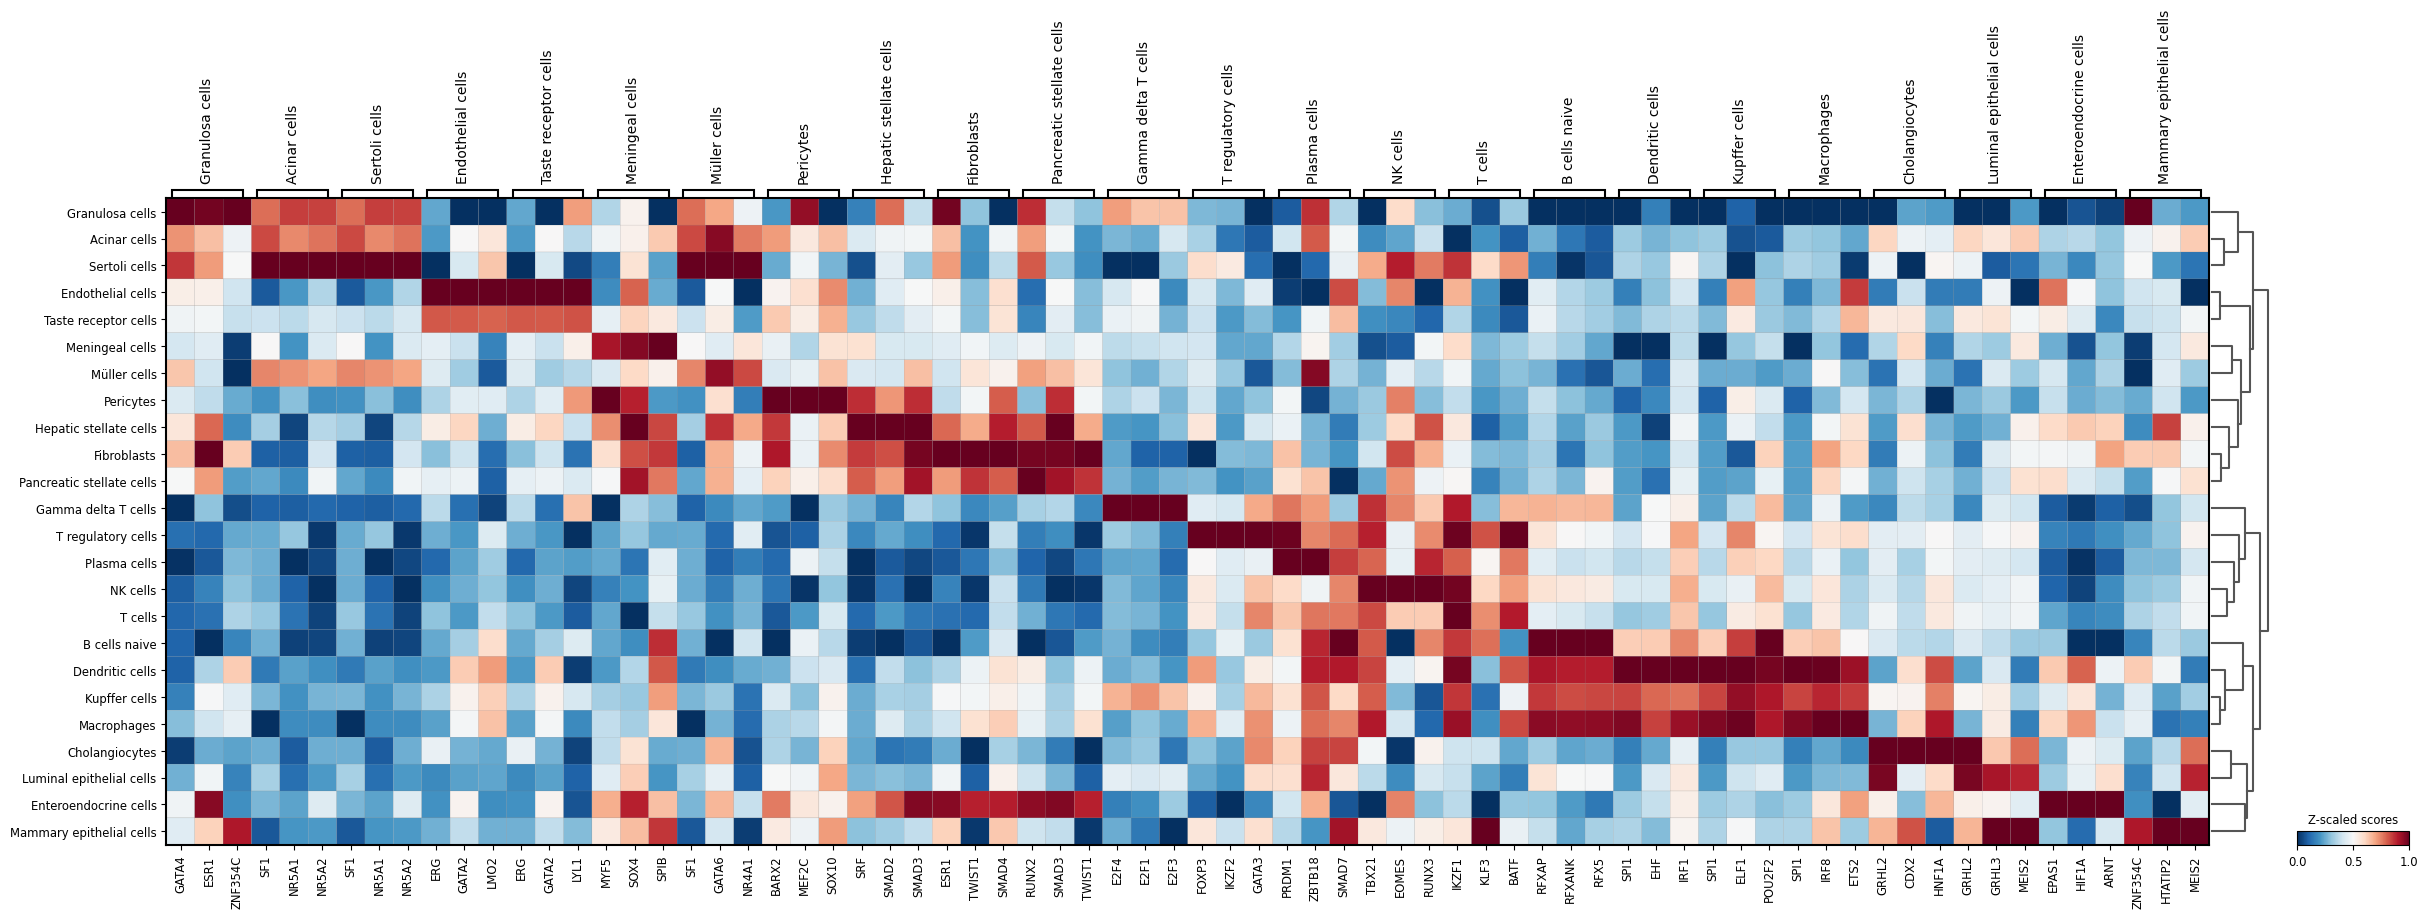

In [24]:
sc.pl.matrixplot(acts, source_markers, 'cell_type', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r',save='_collectri.svg',log=True)